In [1]:
#importing the packages needed
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [0]:
#Loading Input and test data
from keras.datasets import mnist 
(x_train, _), (x_test, _) = mnist.load_data()
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [3]:
#defining mmodel

x_input = Input(shape = (28,28,1))
x = keras.layers.Conv2D(16,(3,3),strides=(1,1), padding='same', activation = 'relu')(x_input)
x = keras.layers.UpSampling2D(size=(2,2))(x)
x = keras.layers.Conv2D(32,(3,3),strides=(2,2), padding='same', activation = 'relu')(x)
x = keras.layers.UpSampling2D(size=(3,3))(x)
x = keras.layers.Conv2D(64,(3,3),strides=(3,3), padding='same', activation = 'relu')(x)
x = keras.layers.UpSampling2D(size=(3,3))(x)
x = keras.layers.Conv2D(64,(3,3),strides=(1,1), padding='same', activation = 'relu')(x)
x = keras.layers.UpSampling2D(size=(2,2))(x)
x = keras.layers.Conv2D(32,(3,3),strides=(2,2), padding='same', activation = 'relu')(x)
x = keras.layers.Conv2D(16,(3,3),strides=(3,3), padding='same', activation = 'relu')(x)


x = keras.layers.Conv2D(8,(3,3),strides=(1,1), padding='same', activation = 'relu')(x)
x = keras.layers.Conv2D(4,(3,3),strides=(1,1), padding='same', activation = 'relu')(x)
x = keras.layers.Conv2D(1,(3,3),strides=(1,1), padding='same', activation = 'sigmoid')(x)


autoen = Model(inputs = x_input, outputs = x)

print(autoen.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 84, 84, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
up_s

In [0]:
autoen.compile(loss='mean_squared_error',
              optimizer = RMSprop())

In [5]:
autoen.fit(x_train, x_train, epochs=3, batch_size=32,
               shuffle=True, validation_data=(x_test, x_test), verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 305s 5ms/step - loss: 7216.5605 - val_loss: 7342.7618
Epoch 2/3
60000/60000 [==============================] - 256s 4ms/step - loss: 7216.6036 - val_loss: 7342.7668
Epoch 3/3
60000/60000 [==============================] - 254s 4ms/step - loss: 7216.5909 - val_loss: 7342.8441


In [0]:
def show_imgs(x_test, decoded_imgs=None, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i+1)
        plt.imshow(x_test[i].reshape(28,28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        if decoded_imgs is not None:
            ax = plt.subplot(2, n, i+ 1 +n)
            plt.imshow(decoded_imgs[i].reshape(28,28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
    plt.show()

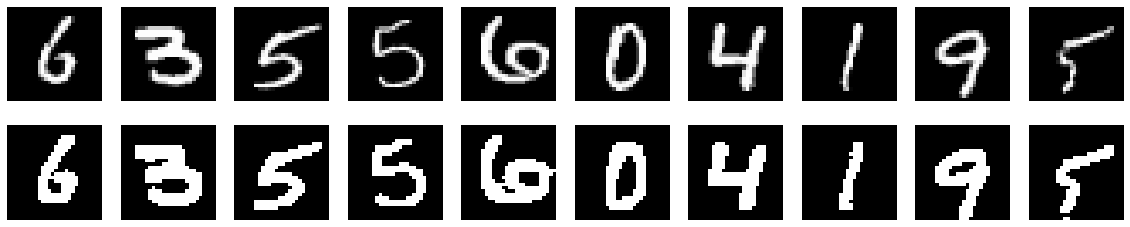

In [7]:
decoded_imgs = autoen.predict(x_test)
#print "input (upper row)\ndecoded (bottom row)"
show_imgs(x_test[50:500], decoded_imgs[50:500])
